In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ss=pd.read_excel('SampleSuperstore.xlsx')
ss.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,,.1
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,NaN,NaN
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,NaN,NaN
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,NaN,NaN
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,NaN,NaN
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,NaN,NaN


In [4]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
 13                0 non-null      float64
 14   .1           0 non-null      float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.1+ MB


In [5]:
ss.describe()

,Postal Code,Sales,Quantity,Discount,Profit,,.1
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,0.0,0.0
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,NaN,NaN
std,32063.693350,623.245101,2.225110,0.206452,234.260108,NaN,NaN
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,NaN,NaN
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,NaN,NaN
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,NaN,NaN
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,NaN,NaN
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,NaN,NaN


OVERALL SALE ANALYSIS
Mean sales = 229.85
25% of sales = 17.28

In [6]:
print('Total sales made', ss['Sales'].sum())

Total sales made 2297200.8603000003


In [7]:
print('Total profit made', ss['Profit'].sum())

Total profit made 286397.0217


Identify the top states and categories with the highest and lowest sales and profits.

In [8]:
state10_sales = ss.groupby('State').agg({'Sales': 'sum', 'Quantity': 'count', 'Profit': 'sum'}).sort_values(by='Sales',ascending =False)[:10].reset_index()
state10_sales.columns = ['State','Total Sales', 'Total Quantity', 'Total Profit']
state10_sales






,State,Total Sales,Total Quantity,Total Profit
0,California,457687.6315,2001,76381.3871
1,New York,310876.2710,1128,74038.5486
2,Texas,170188.0458,985,-25729.3563
3,Washington,138641.2700,506,33402.6517
4,Pennsylvania,116511.9140,587,-15559.9603
5,Florida,89473.7080,383,-3399.3017
6,Illinois,80166.1010,492,-12607.8870
7,Ohio,78258.1360,469,-16971.3766
8,Michigan,76269.6140,255,24463.1876
9,Virginia,70636.7200,224,18597.9504


Some states made a lot of sales but where at a loss.
Texas, Pennysylvania are some of the examples.
What then where the top performing states in terms of sales and profit

In [9]:
state_sales = ss.groupby('State').agg({'Sales': 'sum', 'Quantity': 'count', 'Profit': 'sum'}).sort_values(by='Profit',ascending =False)[:10].reset_index()
state_sales.columns = ['State','Total Sales', 'Total Quantity', 'Total Profit']
state_sales



,State,Total Sales,Total Quantity,Total Profit
0,California,457687.6315,2001,76381.3871
1,New York,310876.2710,1128,74038.5486
2,Washington,138641.2700,506,33402.6517
3,Michigan,76269.6140,255,24463.1876
4,Virginia,70636.7200,224,18597.9504
5,Indiana,53555.3600,149,18382.9363
6,Georgia,49095.8400,184,16250.0433
7,Kentucky,36591.7500,139,11199.6966
8,Minnesota,29863.1500,89,10823.1874
9,Delaware,27451.0690,96,9977.3748


Top performing states in terms of sales and generating profits. 
what impact did the discount cause in sales and profit

In [10]:
discount_impact = ss.groupby('Discount').agg({'Sales': 'count', 'Profit': 'mean'})
discount_impact.columns = ['Sales','Profit']
discount_impact

,Sales,Profit
Discount,,
0.00,4798,66.900292
0.10,94,96.055074
0.15,52,27.288298
0.20,3657,24.702572
0.30,227,-45.679636
0.32,27,-88.560656
0.40,206,-111.927429
0.45,11,-226.646464
0.50,66,-310.703456


Majority of the sales where made with the 0% and 20% discount

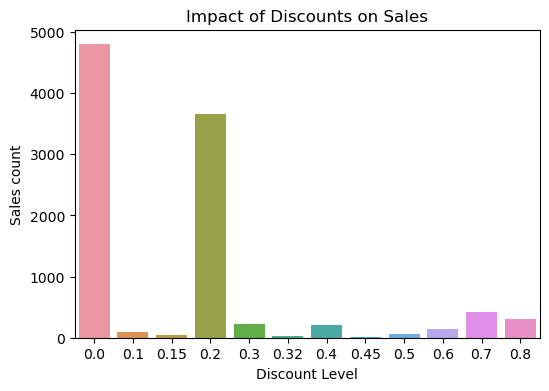

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x=discount_impact.index,  y=discount_impact['Sales']) #label='Average Sales')
#sns.barplot(x= discount_impact.index, y= discount_impact['Profit'], label='Average Profit')

# Adding labels and title
plt.xlabel('Discount Level')
plt.ylabel('Sales count')
plt.title('Impact of Discounts on Sales')

# Displaying the plot
plt.show()

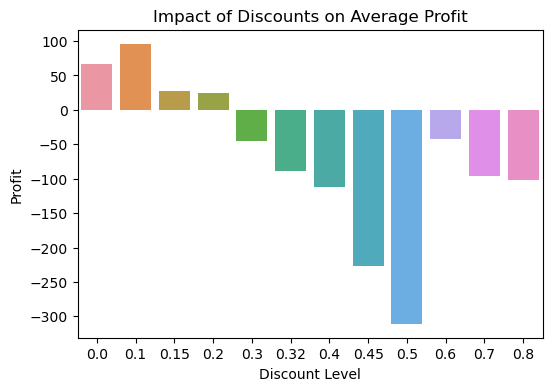

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(x= discount_impact.index, y= discount_impact['Profit']) 

# Adding labels and title
plt.xlabel('Discount Level')
plt.ylabel('Profit')
plt.title('Impact of Discounts on Average Profit')

# Displaying the plot
plt.show()

 The 30% to 80% discount level had negative effect on profit made

In [13]:
AvgSaleDiscount_impact = ss.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'})
AvgSaleDiscount_impact.columns = ['Sales','Profit']
AvgSaleDiscount_impact

,Sales,Profit
Discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


In [14]:
correlation = ss['Discount'].corr(ss['Sales'])
print("Correlation between Discount and Sales:", correlation)

Correlation between Discount and Sales: -0.028190124157535534


In [15]:
correlation = ss['Discount'].corr(ss['Profit'])
print("Correlation between Discount and profit:", correlation)

Correlation between Discount and profit: -0.21948745637176845


In [30]:
correlation = ss['Discount'].corr(ss['Quantity'])
print("Correlation between Discount and Quantity:", correlation)

Correlation between Discount and Quantity: 0.008622970271156508


In [34]:
correlation = ss['Sales'].corr(ss['Quantity'])
print("Correlation between sales and Quantity:", correlation)

Correlation between sales and Quantity: 0.20079477137389748


In [35]:
correlation = ss['Profit'].corr(ss['Sales'])
print("Correlation between profit and sales:", correlation)

Correlation between Discount and Quantity: 0.4790643497377063


There is no strong correlation between Discount and Profit or sale or quntity being sold

# CATEGORY ANALYSIS

In [17]:
ss.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,,.1
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136,NaN,NaN


In [18]:
ss['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
Cat_sales = ss.groupby('Category').agg({'Sales': 'sum', 'Quantity': 'count', 'Profit': 'sum'}).sort_values(by='Sales',ascending =False)[:10].reset_index()
Cat_sales.columns = ['Category','Total Sales', 'Total Quantity', 'Total Profit']
Cat_sales



,Category,Total Sales,Total Quantity,Total Profit
0,Technology,836154.0330,1847,145454.9481
1,Furniture,741999.7953,2121,18451.2728
2,Office Supplies,719047.0320,6026,122490.8008


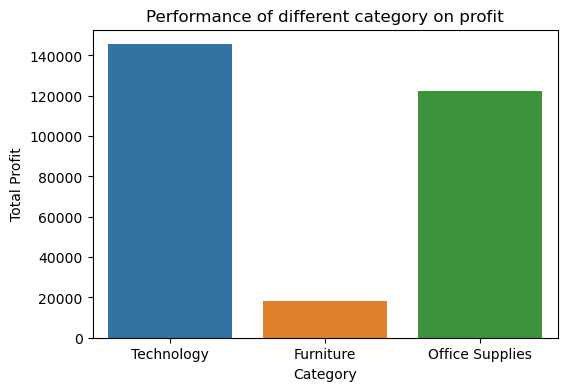

In [20]:
plt.figure(figsize=(6, 4))

sns.barplot(x= Cat_sales['Category'], y= Cat_sales['Total Profit']) 

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Performance of different category on profit')

# Displaying the plot
plt.show()

The store had more profit coming in from the technology and office supplies category

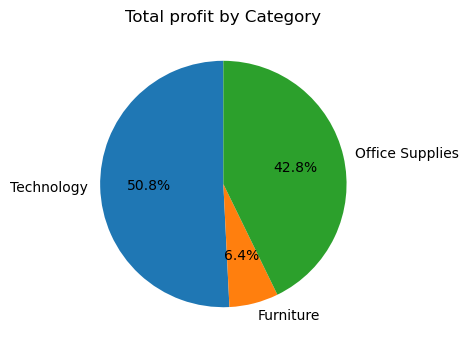

In [21]:
# Plotting the data
plt.figure(figsize=(6, 4))
plt.pie(Cat_sales['Total Profit'], labels=Cat_sales['Category'], autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Total profit by Category')

# Displaying the plot
plt.show()

In [22]:
subcat_sales = ss.groupby('Sub-Category').agg({'Sales': 'sum', 'Quantity': 'count', 'Profit': 'sum'}).sort_values(by='Sales',ascending =False).reset_index()
subcat_sales.columns = ['Sub-Category','Total Sales', 'Total Quantity', 'Total Profit']
subcat_sales



,Sub-Category,Total Sales,Total Quantity,Total Profit
0,Phones,330007.0540,889,44515.7306
1,Chairs,328449.1030,617,26590.1663
2,Storage,223843.6080,846,21278.8264
3,Tables,206965.5320,319,-17725.4811
4,Binders,203412.7330,1523,30221.7633
5,Machines,189238.6310,115,3384.7569
6,Accessories,167380.3180,775,41936.6357
7,Copiers,149528.0300,68,55617.8249
8,Bookcases,114879.9963,228,-3472.5560
9,Appliances,107532.1610,466,18138.0054


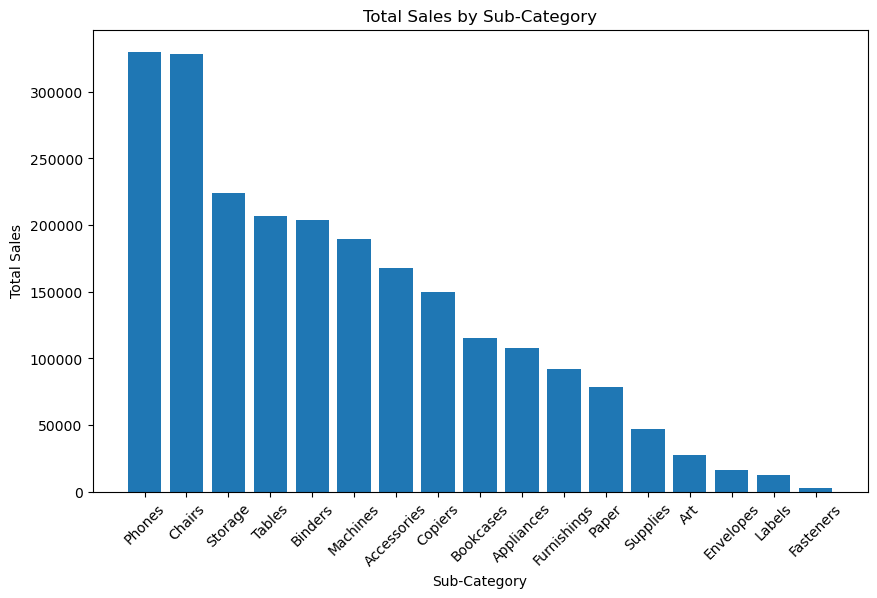

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(subcat_sales['Sub-Category'], subcat_sales['Total Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sub-Category')

# Rotating the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

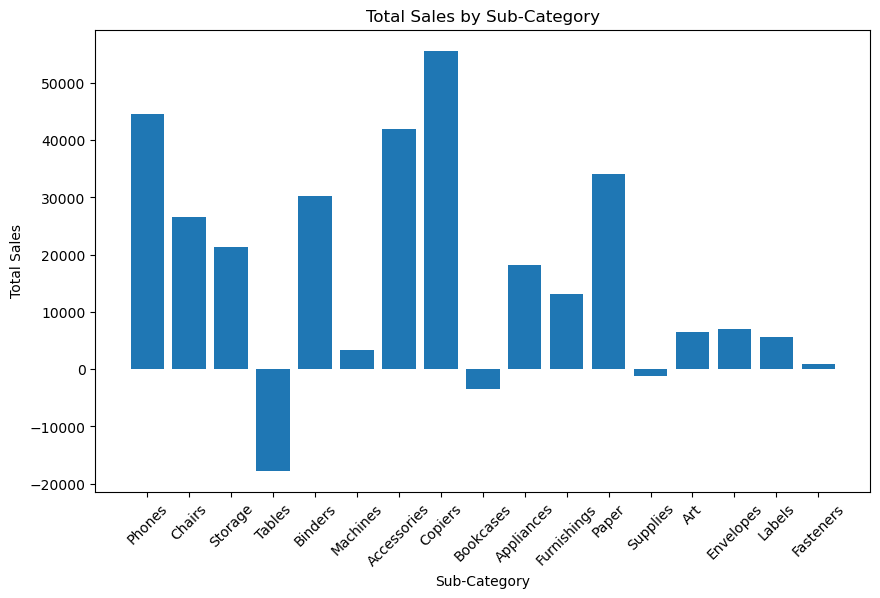

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(subcat_sales['Sub-Category'], subcat_sales['Total Profit'])
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sub-Category')

# Rotating the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

Tables, Bookcase,Supplies all made loss. Tables generated more sales but came at a loss. Check into the discount level given for this products

performance of Sub-category on sales and profit

In [49]:
filtered_states= ('California','New York','Washington')
top3_states = ss[ss['State']==filtered_states]
print(top3_states)

Empty DataFrame
Columns: [Ship Mode, Segment, Country, City, State, Postal Code, Region, Category, Sub-Category, Sales, Quantity, Discount, Profit,  ,  .1]
Index: []


Ship  mode analysis

In [29]:
ship_mode = ss.groupby('Ship Mode').agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'}).sort_values(by='Profit',ascending =False)[:10].reset_index()
ship_mode.columns = ['Ship mode','Total Sales', 'Total Quantity', 'Total Profit']
ship_mode



,Ship mode,Total Sales,Total Quantity,Total Profit
0,Standard Class,1.358216e+06,22797,164088.7875
1,Second Class,4.591936e+05,7423,57446.6354
2,First Class,3.514284e+05,5693,48969.8399
3,Same Day,1.283631e+05,1960,15891.7589


customers use the standard class ship mode more and yields more profit compared to second class. Same day shipping mode was not used relative to the other mode

From the general analysis there is no correlation between discount and sales or profit. the 30-80% discount causes loss for the store. more data will show how. 

More profit were made from office and technology category of the store.
The standard class was more used by customers as compared to same day delivery